In [ ]:
#installs
#!pip install xlrd
#!pip install uncertainties

In [ ]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit

In [ ]:
#definition constants


In [ ]:
#read data into dataframe
df = pd.read_excel('pyData.xlsx')

#converte dataframe to array
data_array = df.values

#split array into 2 arrays
split_col_index = 2
data_array1 = data_array[:, :split_col_index]
data_array2 = data_array[:, split_col_index:]

#delete Nan-values in 2nd array
idx = np.where(~np.isnan(data_array2[:,0]))[0][-1] + 1
data_array2 = data_array2[:idx, :]

#declare uncertainty array
dy_dx = np.gradient(data_array1[:,1], data_array1[:,0])
uncertainty_array1 = np.full(68, 0.5)
uncertainty_array1 = np.column_stack((uncertainty_array1, dy_dx))

uncertainty_array2 = np.array([0.5, 0.012])

#covert data array and uncertainty array into one uarray
uData1 = unp.uarray(data_array1, uncertainty_array1)
uData2 = unp.uarray(data_array2, uncertainty_array2)

#delete all values for T<0.1
uData1 = uData1[uData1[:,0] >= 220]
#convert Grad C to Kelvin
for row in uData1:
    row[0] += 273


Fitparameter
[ 1.29173383e-11 -2.40922910e-01]
zugehörige Uncertainty
[3.15116588e-14 3.44997414e-03]


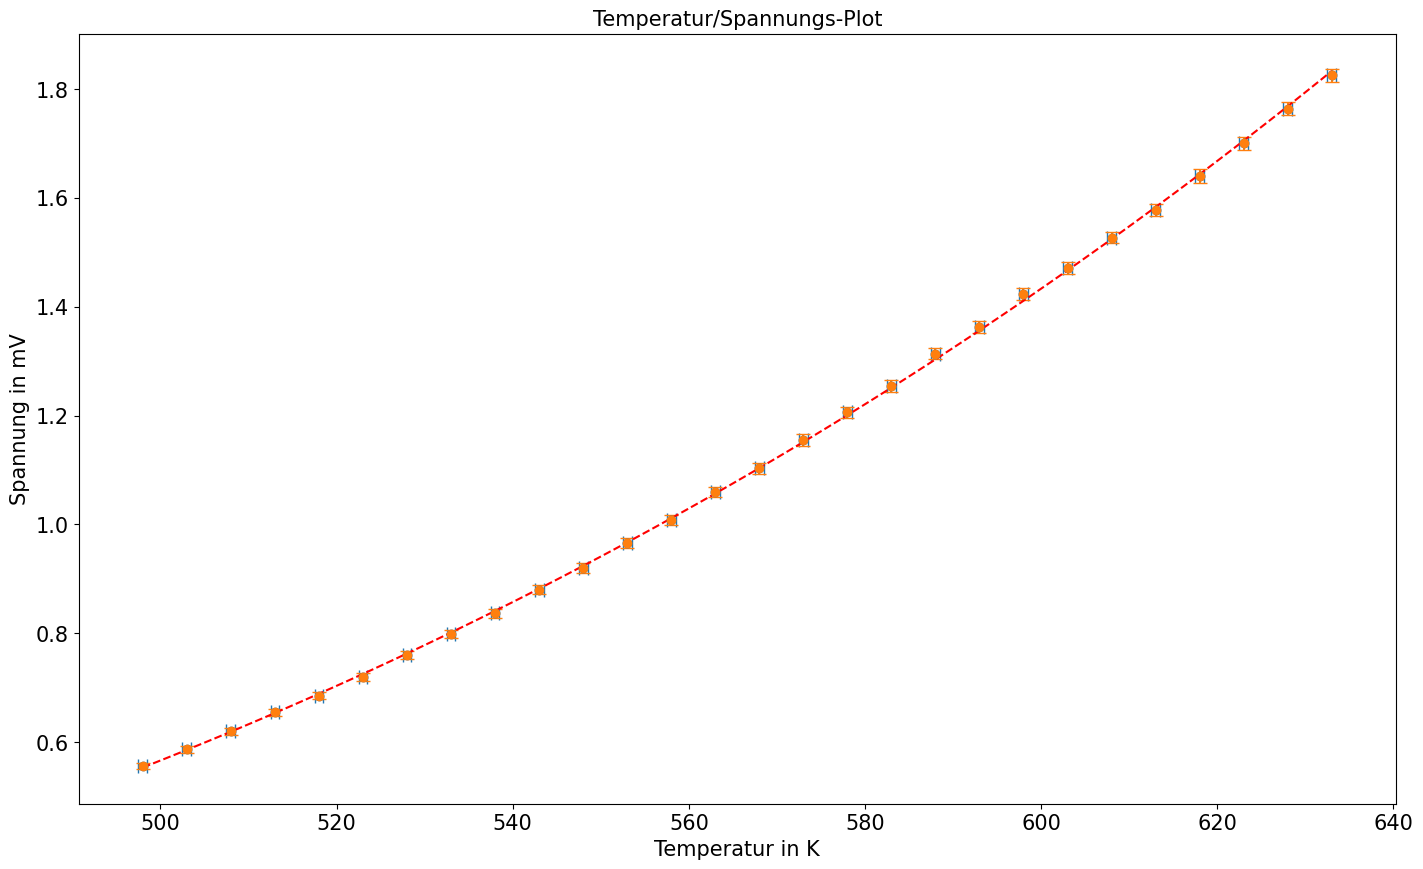

In [ ]:
def exponentialfunct(x, a, b):
    return (a*x**4 + b)

#Erstellen der Datensets für den Fitplot
def daten_fitten(funct, x_data, y_data, genauigkeit, p): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min(x_data), max(x_data), genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

# Extract the x and y values from the data array
x = [float(i[0].nominal_value) for i in uData1]
y = [float(i[1].nominal_value) for i in uData1]

x_error = [float(i[0].std_dev) for i in uData1]
y_error = [float(i[1].std_dev) for i in uData1]

pars, stdevs, xfit, yfit = daten_fitten(exponentialfunct, x, y, 100, [1, 1])

plt.subplots(1,1,figsize=(17, 10));

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5)
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5)

plt.plot(xfit, yfit, '--', color='red', label = 'exponential Fit')

# Add axis labels and a title
plt.xlabel('Temperatur in K', fontsize=15)
plt.ylabel('Spannung in mV', fontsize=15)
plt.title('Temperatur/Spannungs-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.show()




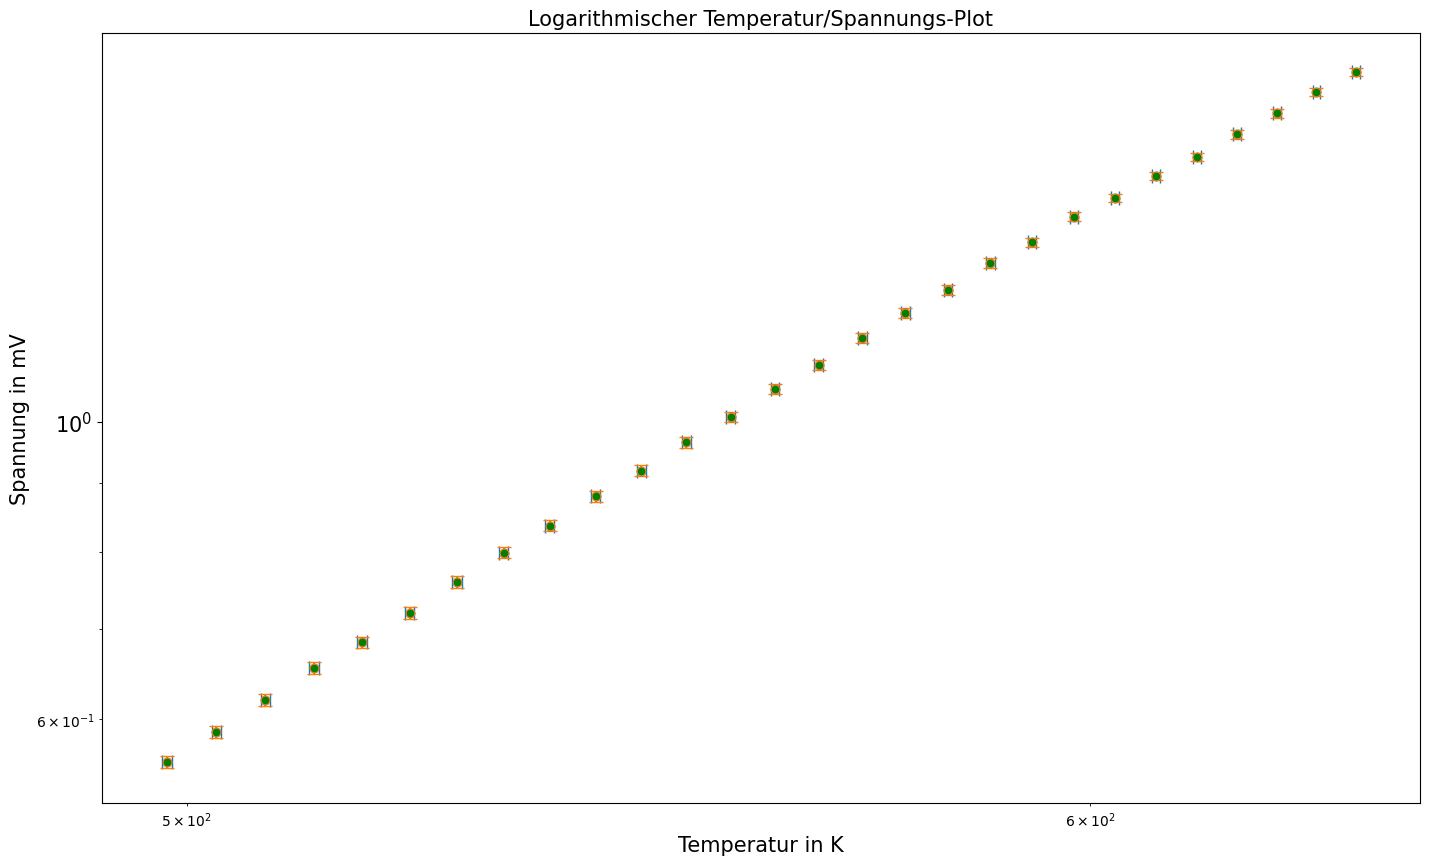

In [ ]:
plt.subplots(1,1,figsize=(17, 10));

# Extract the x and y values from the data array
x = [float(i[0].nominal_value) for i in uData1]
y = [float(i[1].nominal_value) for i in uData1]


plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

# Extract the errors from the data array
x_err = [float(i[0].std_dev) for i in uData1]
y_err = [float(i[1].std_dev) for i in uData1]

# Plot the data with errorbars
plt.errorbar(x, y, xerr=x_err, fmt='o', capsize=5)
plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5)

# Add axis labels and a title
plt.xlabel('Temperatur in K', fontsize=15)
plt.ylabel('Spannung in mV', fontsize=15)
plt.title('Logarithmischer Temperatur/Spannungs-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.loglog(x, y, linestyle='none')
#plt.axis([0, 370, 0, 2]) #Achsenanpassung
plt.show()


Slope:  0.026945980960146325
Intercept:  -0.16132463509253392


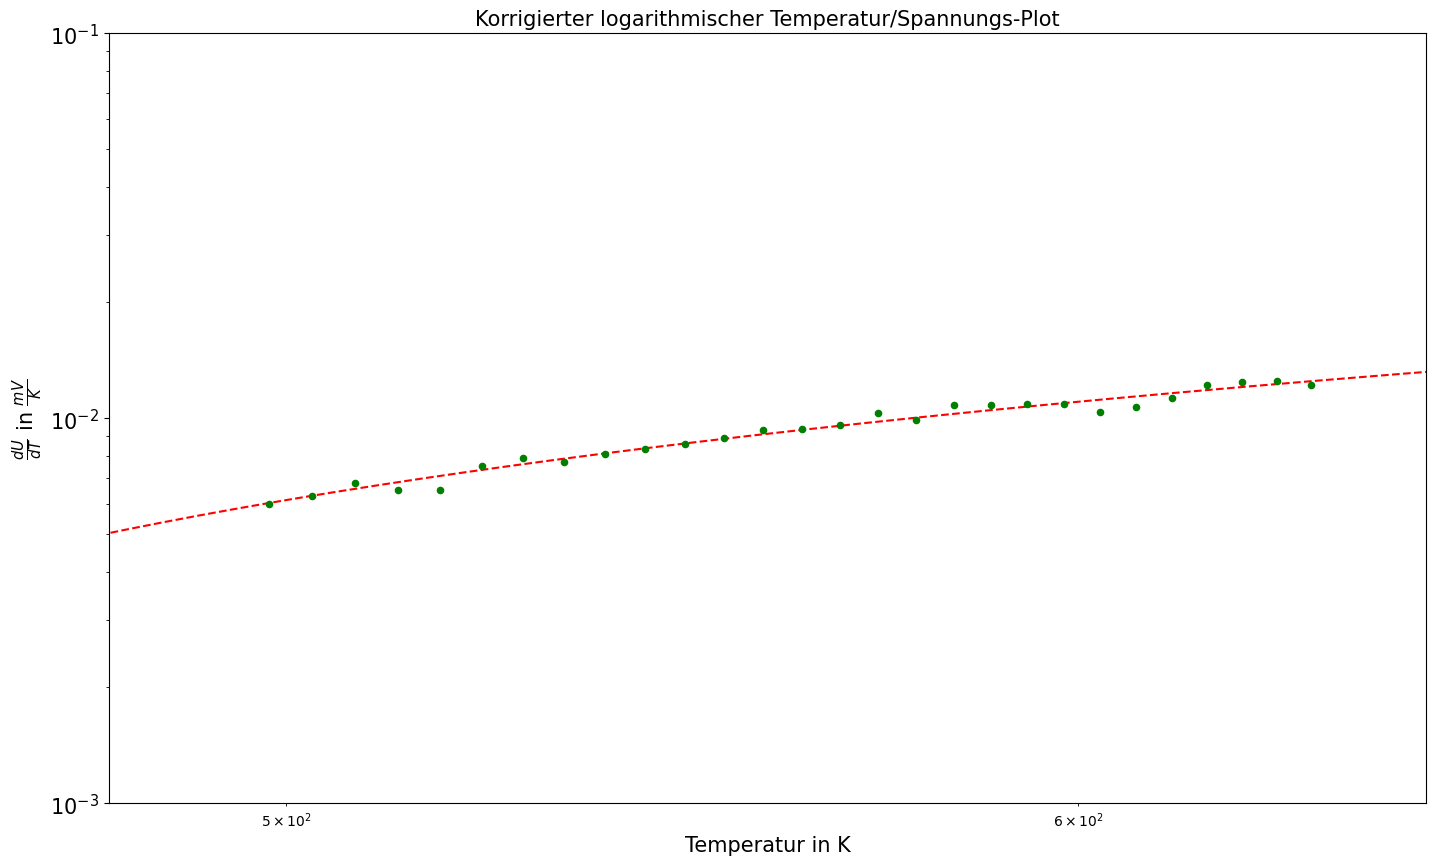

In [ ]:
def log_func(x, a, b):
    return a * np.log(x) + b


plt.subplots(1,1,figsize=(17, 10));

# Extract the x and y values from the data array
x = [float(i[0].nominal_value) for i in uData1]
y = [float(i[1].nominal_value) for i in uData1]

dy_dx = np.gradient(y, x)

plt.scatter(x, dy_dx, label = 'Daten', color='green', s=20, zorder= 5)


popt, pcov = sc.optimize.curve_fit(log_func, x, dy_dx)
a, b = popt
x_line = arange(1, 20000)
y_line = log_func(x_line, a, b)
perr = np.diag(pcov)
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')
print('Slope: ', popt[0])
print('Intercept: ', popt[1])
# Add axis labels and a title
plt.xlabel('Temperatur in K', fontsize=15)
plt.ylabel(r'$\frac{dU}{dT}$ in $\frac{mV}{K}$', fontsize=15)
plt.title('Korrigierter logarithmischer Temperatur/Spannungs-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([480, 650, 0.001, 0.1]) #Achsenanpassung
plt.loglog(x, y, linestyle='none')
plt.show()

[[ 0.01363263 -0.08636472]
 [-0.08636472  0.54720336]]
Slope:  2.992820801768098
Intercept:  -23.652050621838374


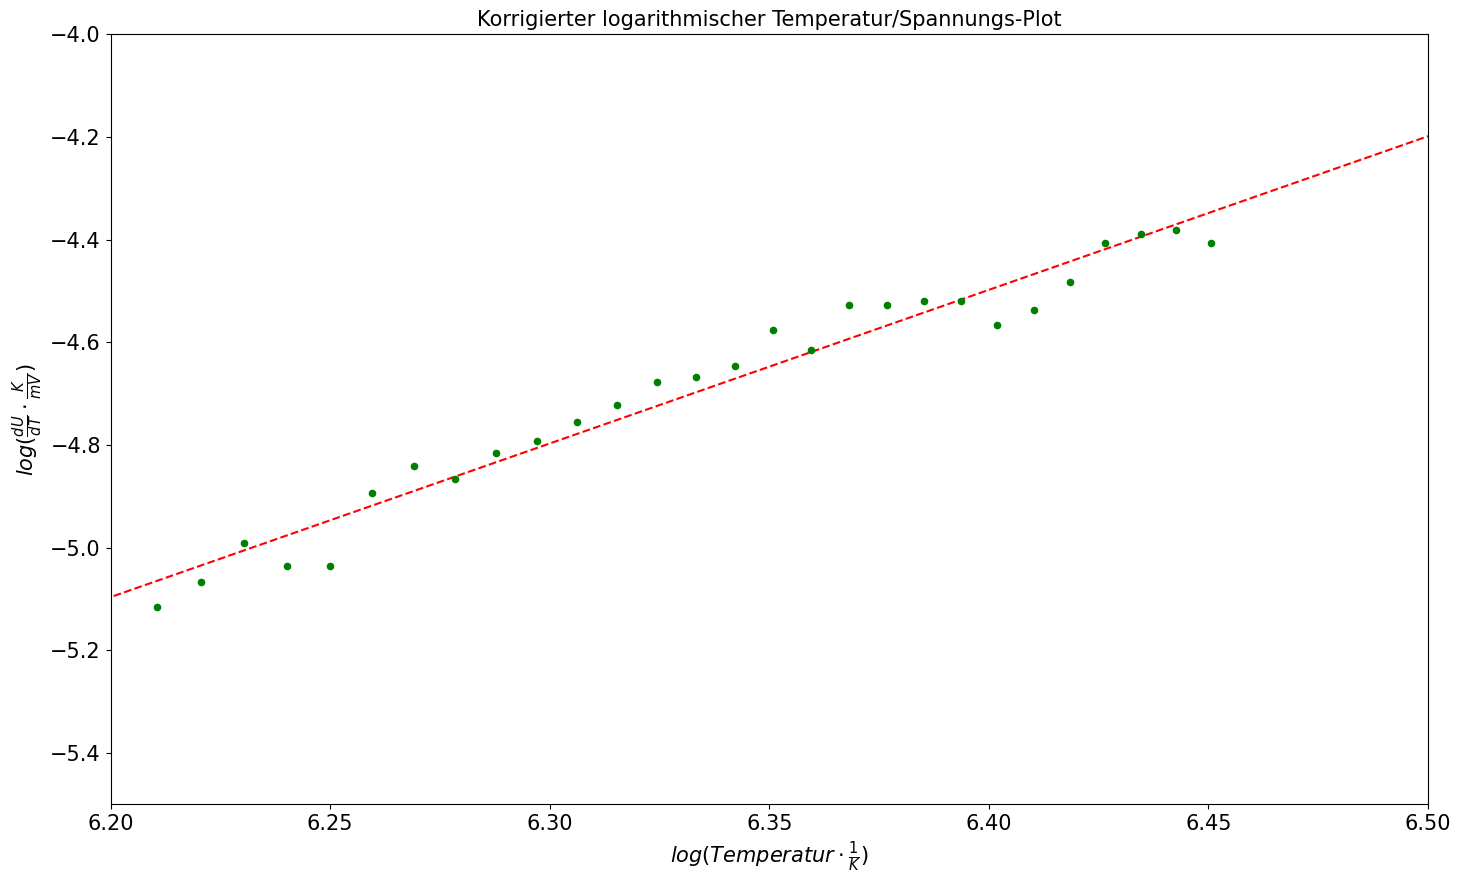

In [ ]:
def lin(x, a, b):
    return a *x + b


plt.subplots(1,1,figsize=(17, 10));

# Extract the x and y values from the data array
x = [float(i[0].nominal_value) for i in uData1]
y = [float(i[1].nominal_value) for i in uData1]

dy_dx = np.gradient(y, x)

for i in range(len(x)):
    x[i] = np.log(x[i])

for i in range(len(dy_dx)):
    dy_dx[i] = np.log(dy_dx[i])

plt.scatter(x, dy_dx, label = 'Daten', color='green', s=20, zorder= 5)


popt, pcov = sc.optimize.curve_fit(lin, x, dy_dx)
a, b = popt
x_line = arange(1, 20000)
y_line = lin(x_line, a, b)
perr = np.diag(pcov)
print(pcov)
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')
print('Slope: ', popt[0])
print('Intercept: ', popt[1])
# Add axis labels and a title
plt.xlabel(r'$log(Temperatur \cdot \frac{1}{K})$', fontsize=15)
plt.ylabel(r'$log(\frac{dU}{dT} \cdot \frac{K}{mV})$', fontsize=15)
plt.title('Korrigierter logarithmischer Temperatur/Spannungs-Plot', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([6.2, 6.5, -5.5, -4]) #Achsenanpassung#
plt.show()

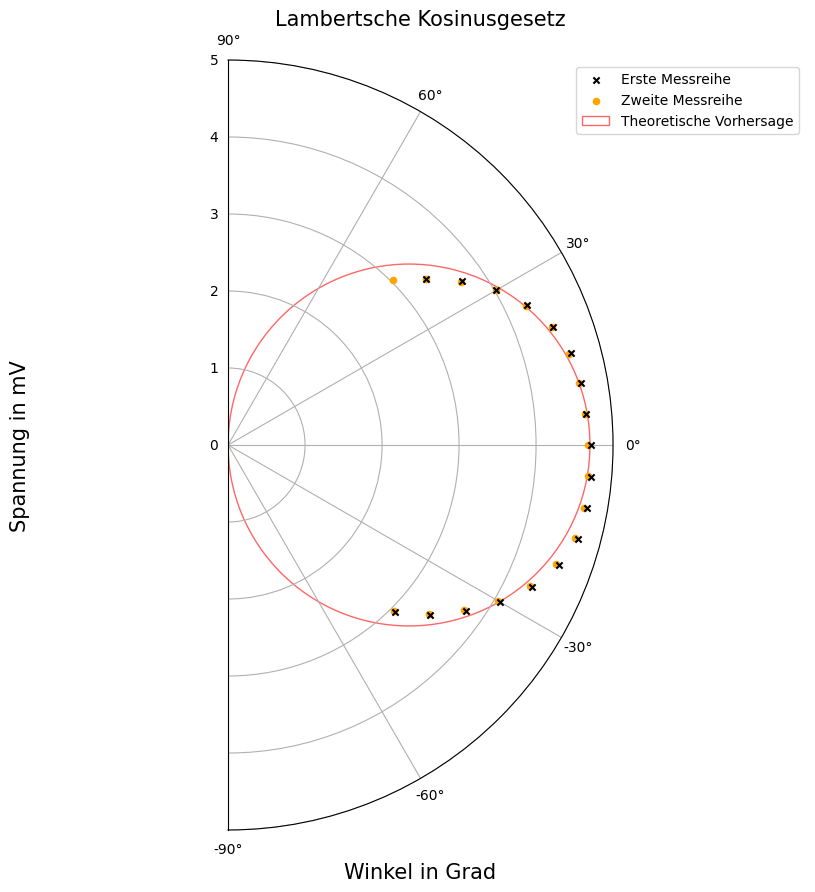

In [ ]:
def polar_coordinates(x, y):
    # Convert x and y values to polar coordinates
    r = np.sqrt(np.power(x,2) + np.power(y,2))
    theta = np.arctan2(y, x)

    # Convert theta to degrees
    theta = np.rad2deg(theta)

    # Adjust negative degrees to positive
    theta[theta < 0] += 360

    # Return polar coordinates as tuple (theta, r)
    return (theta, r)

# Extract the x and y values from the data array
x = [float(i[0].nominal_value) for i in uData2]
y = [float(i[1].nominal_value) for i in uData2]

x = np.deg2rad(x)

#plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

#theta, r = polar_coordinates(x, y)

# Extract the errors from the data array
x_err = [float(i[0].std_dev) for i in uData2]
y_err = [float(i[1].std_dev) for i in uData2]

#theta_error, r_error = polar_coordinates(x_err, y_err)

# Plot the data with errorbars
#plt.errorbar(theta, r, xerr=theta_error, fmt='o', capsize=5)
#plt.errorbar(theta, r, yerr=r_error, fmt='o', capsize=5)

x1 = x[:18]
x2 = x[18:]

y1 = y[:18]
y2 = y[18:]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.scatter(x1, y1, label = 'Erste Messreihe', color='black', s=20, zorder= 6, marker='x')
plt.scatter(x2, y2, label = 'Zweite Messreihe', color='orange', s=20, zorder= 5)

ax.set_rmax(5)
ax.grid(True)
fig.set_size_inches(10, 10)
ax.set_thetamin(90)
ax.set_thetamax(-90)
circle = plt.Circle((2.35, 0), 2.35, transform=ax.transData._b, color='red', alpha=0.6, fill=False, label= 'Theoretische Vorhersage')
ax.add_artist(circle)
# Add axis labels and a title
plt.xlabel('Winkel in Grad', fontsize=15)
plt.ylabel('Spannung in mV', fontsize=15)
plt.title('Lambertsche Kosinusgesetz', fontsize=15)
plt.legend()


# Display the plot
plt.show()

In [ ]:
sensmin = 0.02 #mV/(Watt*m^2)
sensmax = 0.04 #mV/(Watt*m^2)
dBlende = ufloat(0.02, 0.001) #m
dTermo = ufloat(0.025, 0.001) #m
abstandBlendeTermo = ufloat(0.13, 0.01) #m

Winkel = unp.arctan(dTermo/(2*abstandBlendeTermo))
Raumwinkel = 4*np.pi*(unp.sin(Winkel/2))**2
maxU = uData1[len(uData1)-1][1]
maxT = uData1[len(uData1)-1][0]
maxSigma = maxU/(sensmin * maxT**4 * Raumwinkel)
minSigma = maxU/(sensmax * maxT**4 * Raumwinkel)
print(maxSigma)
print(minSigma)

(1.97+/-0.34)e-08
(9.9+/-1.7)e-09
